# Principal Component Analysis (PCA)

[Principal component analysis](https://www.ibm.com/think/topics/principal-component-analysis#:~:text=Principal%20component%20analysis%2C%20or%20PCA,of%20variables%2C%20called%20principal%20components.), or PCA, reduces the number of dimensions in large datasets to principal components that retain most of the original information. It does this by transforming potentially correlated variables into a smaller set of variables, called principal components. PCA is powered by linear algebra and often uses Singular Value Decomposition (SVD)—a mathematical technique that factorizes a data matrix into three components to reveal its structure. SVD identifies the directions in which the data varies the most, making it possible to represent the dataset with fewer dimensions while preserving its essential patterns.

<center><img src="pca_visualization.png" style="width: 45%;";/></center>

### Key Elements in the Image:
- Blue Axes (X and Y): These are the original coordinate axes representing the original features (e.g., culmen length and body mass).

- Green Arrows (PC1 and PC2): These are the principal components, which are new axes constructed from linear combinations of the original variables.

    - PC1 (Principal Component 1): This is the direction in which the data varies the most. PCA rotates the axes so PC1 aligns with this maximum variance.

    - PC2 (Principal Component 2): This is the next orthogonal direction (at a right angle to PC1) that captures the second most variance.

- Data Points (green dots): These represent the observations in the dataset. They appear elongated along PC1 because that’s the direction with the greatest spread (variance).

- Gray Brackets Labeled “Variance”: These illustrate that PCA is concerned with how spread out the data is in each direction. PC1 captures the largest spread; PC2 captures the second largest.

- **Summary:** This image shows how PCA reorients the data along new axes (PC1 and PC2) to better represent the structure and variance of the dataset. PC1 explains the most variance. PC2 explains the next most, while being orthogonal (uncorrelated) to PC1. These new axes simplify the dataset and make it easier to analyze or visualize, especially in high dimensions.

## Algorithm
1. **Standardize the Data:** Scale the features so that each has a mean of 0 and standard deviation of 1. This ensures that all variables contribute equally to the analysis.

2. **Compute the Covariance Matrix:** Create a square matrix that shows how each variable in the dataset varies with every other variable.

3. **Calculate Eigenvectors and Eigenvalues:** Determine the eigenvectors (directions of maximum variance) and their corresponding eigenvalues (amount of variance) from the covariance matrix.

4. **Sort Eigenvectors by Eigenvalue:** Rank the eigenvectors in descending order of their eigenvalues. This prioritizes the directions that capture the most variance.

5. **Select Top k Principal Components:** Choose the top k eigenvectors that capture the most variance (e.g., enough to explain 90–95% of the total variance). This determines the number of dimensions to keep.

6. **Project Data onto New Feature Space:** Multiply the original standardized data by the matrix of selected eigenvectors. This transforms the data into a lower-dimensional space defined by the principal components.

## Applications
[Read more here](https://www.ibm.com/think/topics/principal-component-analysis#:~:text=Principal%20component%20analysis%2C%20or%20PCA,of%20variables%2C%20called%20principal%20components.)
- [image compression](../4.%20Image%20Compression%20with%20Singular%20Value%20Decomposition/image_compression.ipynb)
- data visualization
- noise filtering

## Limitations
- assumes linearity
- sensitive to outliers
- principal components can be hard to interpret
- loss of information

## Explore Data
In this notebook, we will be using the country.csv dataset and applying PCA for visualizing high dimensional data in a lower dimensional space. We will import [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from scikit learn.

In [11]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

# Load dataset
# Load the country dataset
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


It looks like we have nine numerical feature columns to work with in this data set. We aim to reduce it down to two.

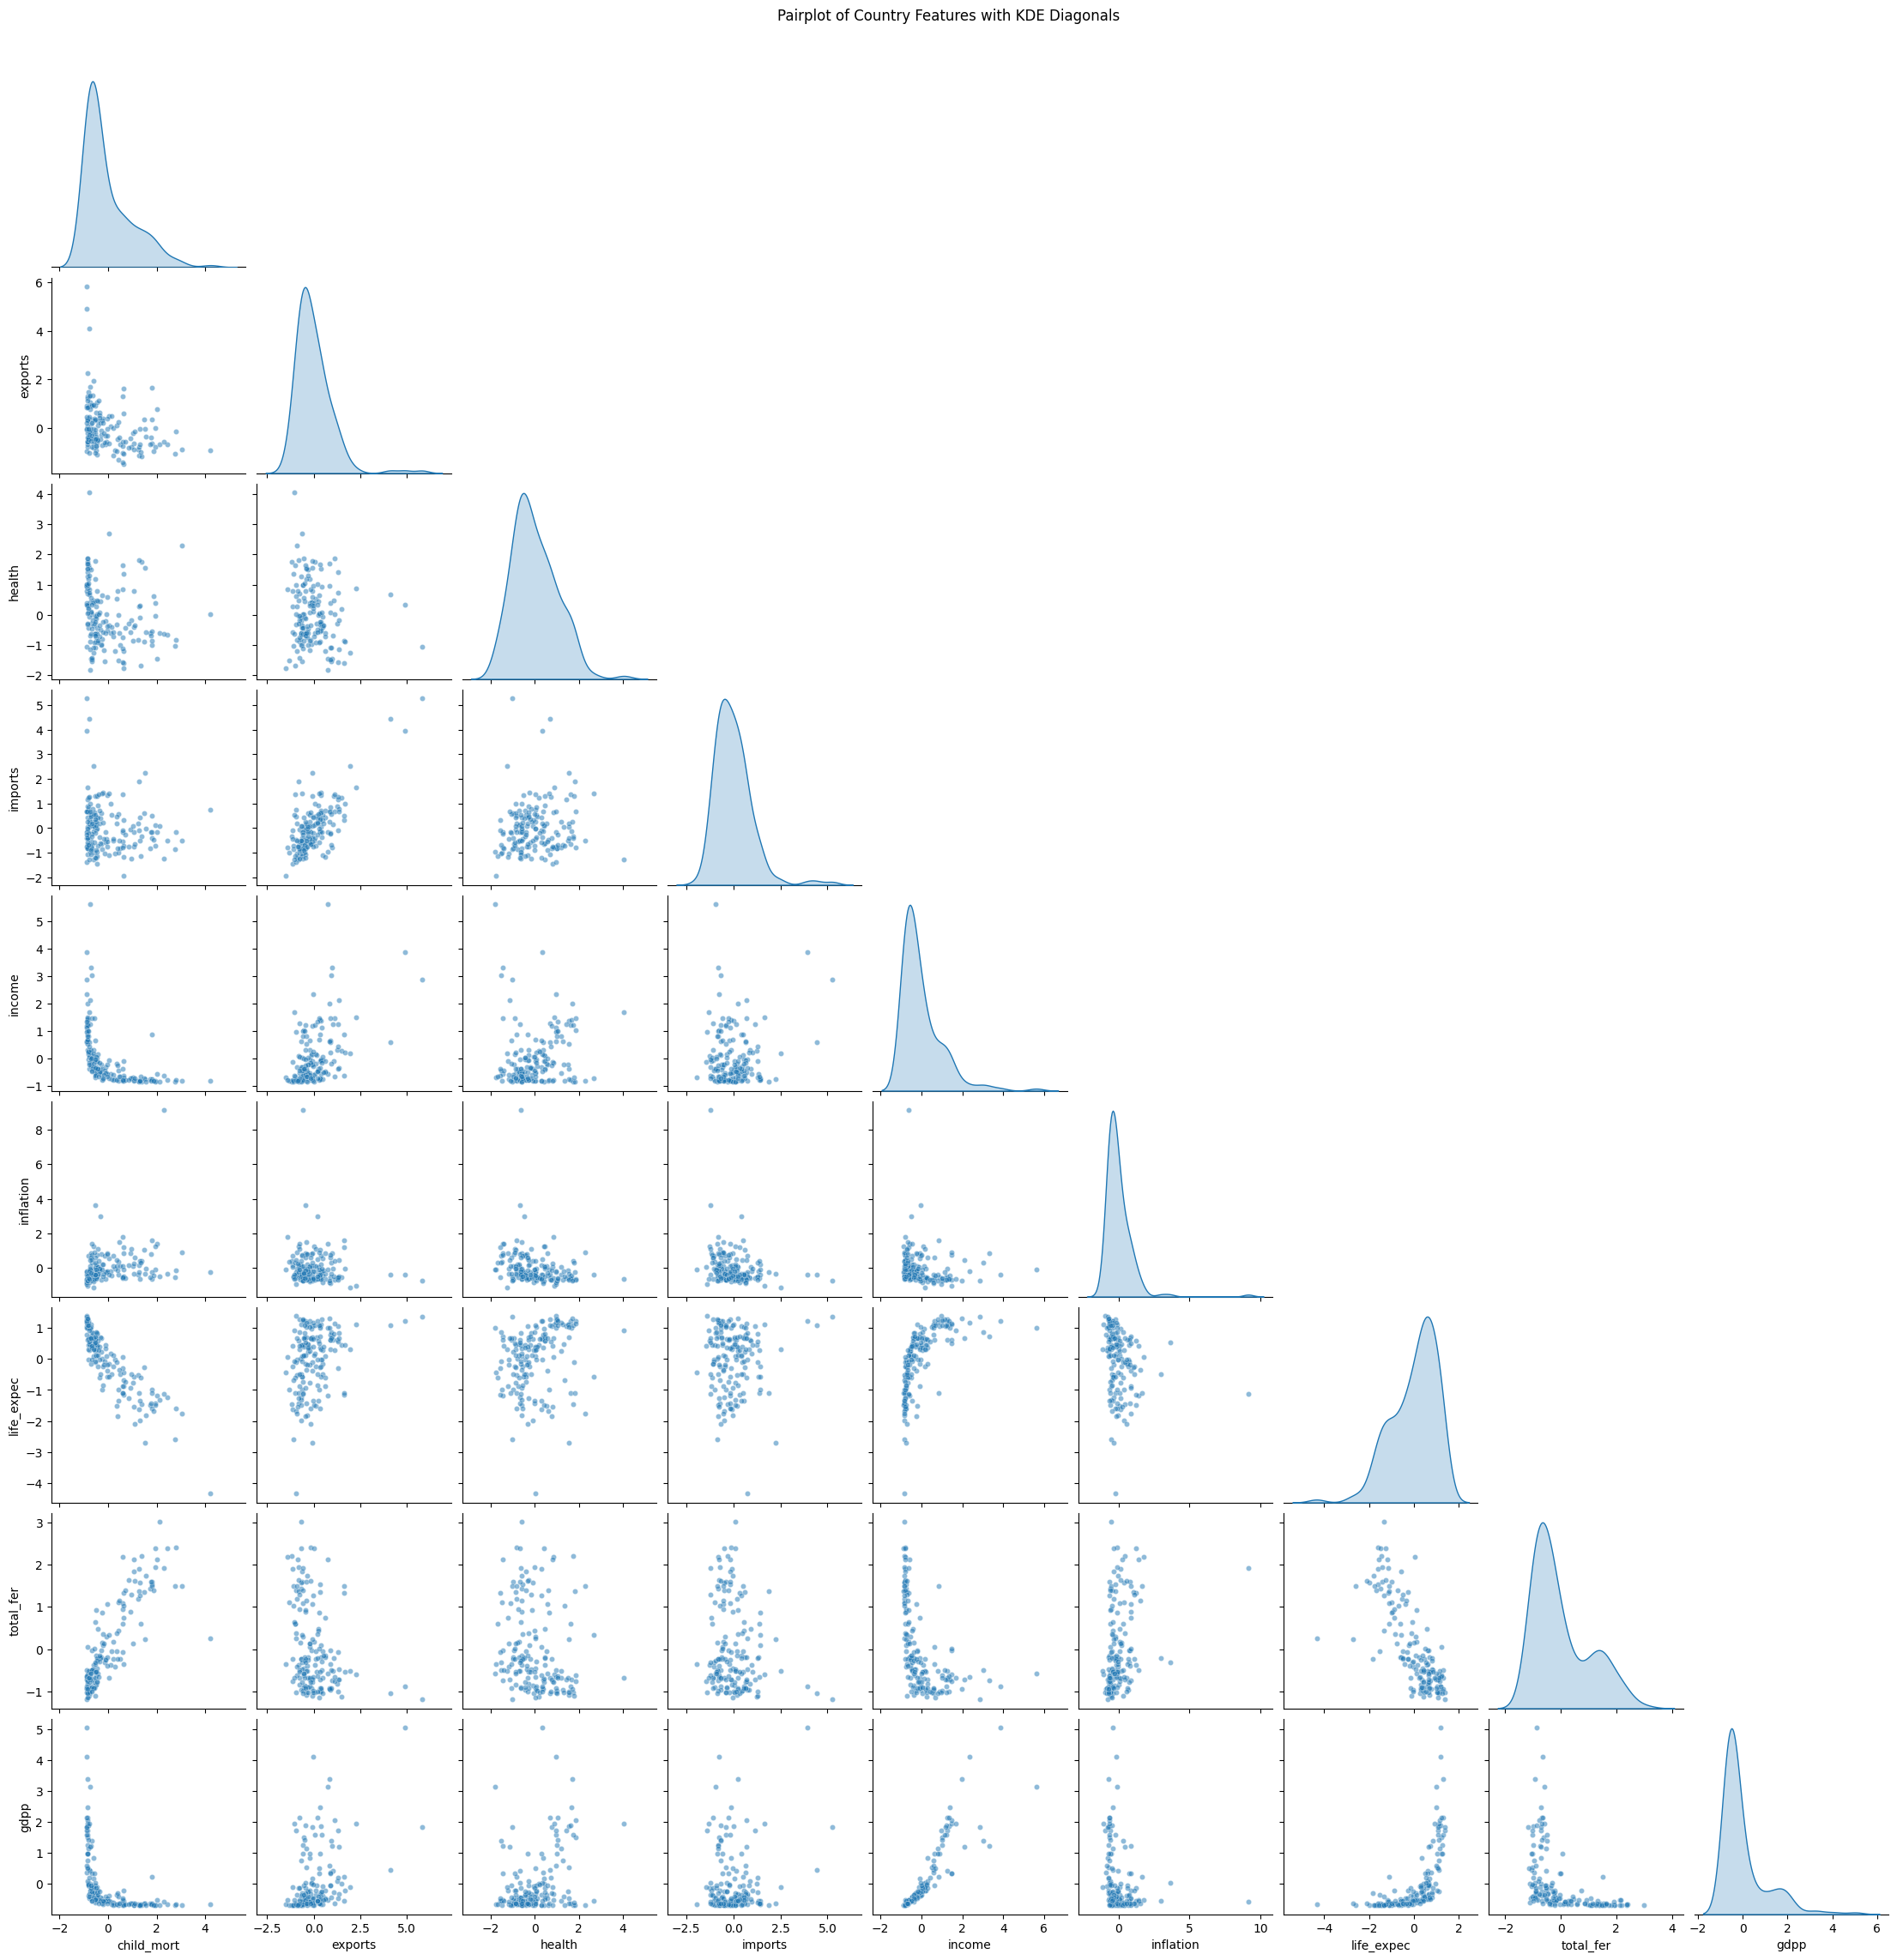

In [16]:
# Drop non-numeric or identifier columns
features_df = df.drop(columns=["country"])
country_names = df["country"]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_df)
scaled_df = pd.DataFrame(X_scaled, columns=features_df.columns)

# Create the pairplot with KDEs on the diagonal
sns.pairplot(scaled_df, corner=True, diag_kind="kde", plot_kws={"alpha": 0.5, "s": 20})
plt.suptitle("Pairplot of Country Features with KDE Diagonals", y=1.02)
plt.show()

This pairplot reveals the relationships between standardized country-level features, with KDE (Kernel Density Estimate) plots on the diagonals showing the distribution of each variable. We observe some positive correlations between features like exports, income, and health, suggesting that wealthier countries tend to have higher export rates and better healthcare. In contrast, child mortality shows a strong negative correlation with variables like life expectancy and GDP, reflecting poorer health outcomes in lower-income countries. Other features such as inflation appear less correlated with others, showing more scattered distributions. The pairplot suggests some collinearity among socioeconomic indicators, which will be useful for PCA.

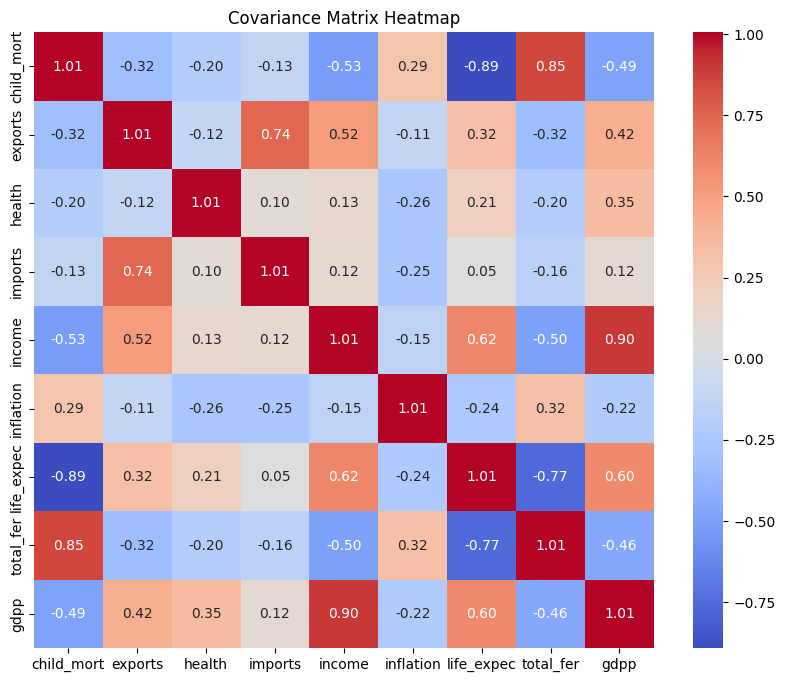

In [14]:
# Compute covariance matrix
cov_matrix = np.cov(X_scaled, rowvar=False)
cov_df = pd.DataFrame(cov_matrix, index=scaled_df.columns, columns=scaled_df.columns)

# Covariance matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_df, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Covariance Matrix Heatmap")
plt.show()

Similar to the pairplot above, the covariance heatmap shows correlations between socioeconomic indicators across countries. These correlations indicate redundancy among variables.

## Implement and Evaluate Model

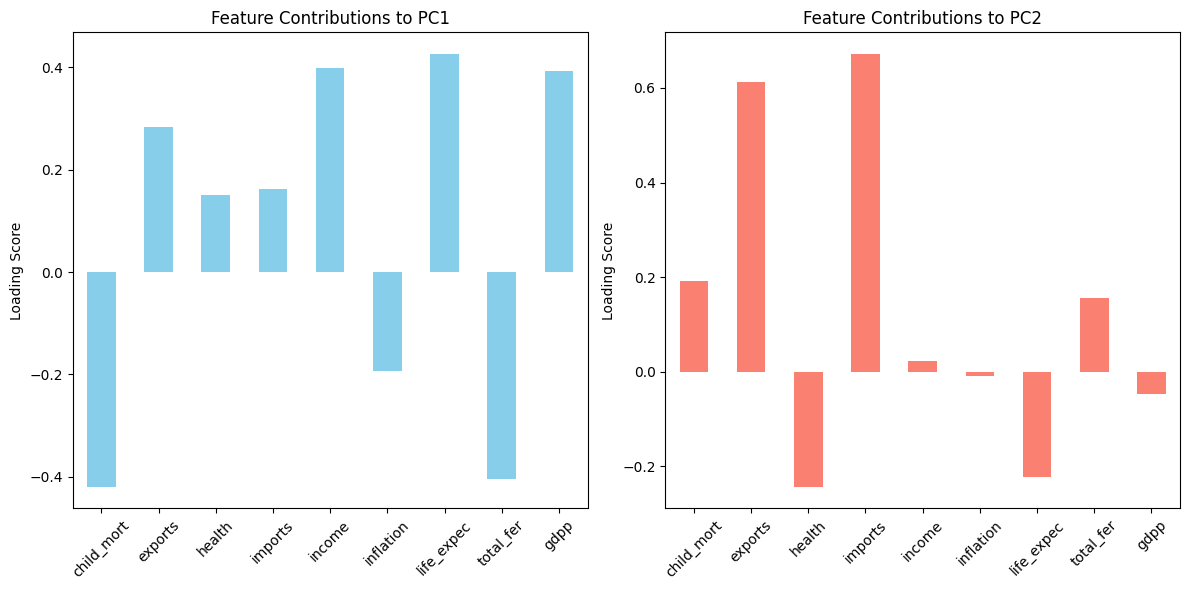

In [18]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame of PCA loadings
loadings_df = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=scaled_df.columns
)

# --- Plot 2: Bar Charts for PC1 and PC2 Loadings ---
plt.figure(figsize=(12, 6))

# PC1
plt.subplot(1, 2, 1)
loadings_df["PC1"].plot(kind="bar", color="skyblue")
plt.title("Feature Contributions to PC1")
plt.ylabel("Loading Score")
plt.xticks(rotation=45)

# PC2
plt.subplot(1, 2, 2)
loadings_df["PC2"].plot(kind="bar", color="salmon")
plt.title("Feature Contributions to PC2")
plt.ylabel("Loading Score")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


These bar charts display the feature contributions (loadings) to the first two principal components (PC1 and PC2). For PC1, the variables contributing most positively include life expectancy, income, and GDP, while child mortality and fertility rate contribute most negatively—indicating that PC1 captures a gradient from low-development to high-development countries. In contrast, PC2 is driven largely by imports and exports, suggesting it captures economic openness or trade balance. Together, these visualizations help explain how PCA reorganizes the data along meaningful axes reflecting development and economic characteristics.

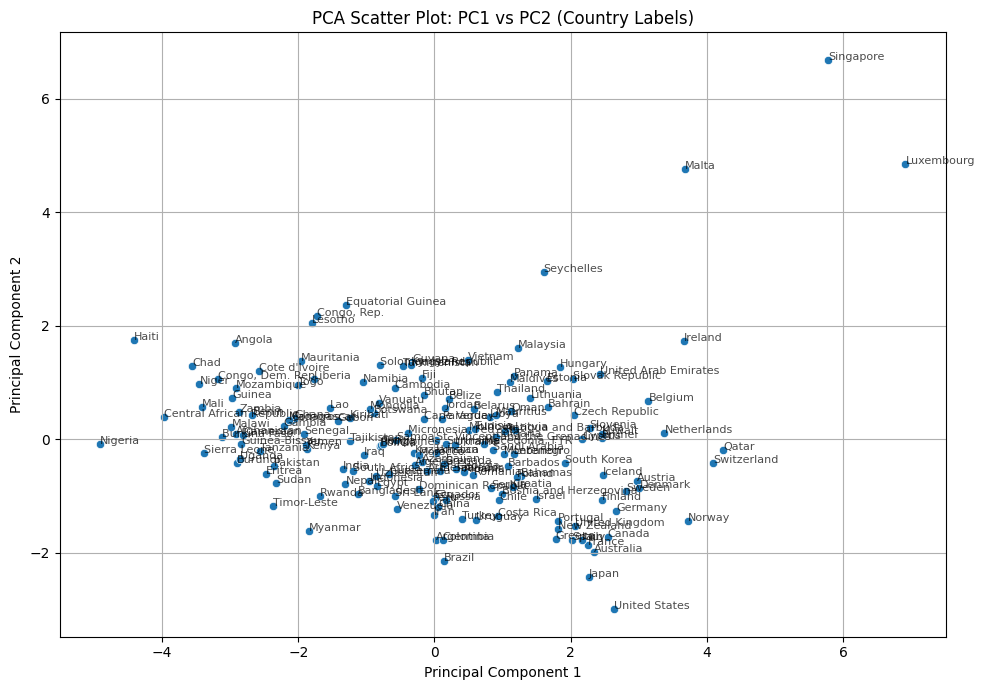

In [19]:
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["country"] = country_names

plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x="PC1", y="PC2")
for i in range(len(pca_df)):
    plt.text(pca_df["PC1"][i], pca_df["PC2"][i], pca_df["country"][i], fontsize=8, alpha=0.7)
plt.title("PCA Scatter Plot: PC1 vs PC2 (Country Labels)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

This PCA scatter plot displays countries projected onto the first two principal components (PC1 and PC2). Countries like Singapore, Luxembourg, and Malta are far from the center along PC1 and PC2, indicating distinct socio-economic profiles—likely high GDP, income, and life expectancy. In contrast, countries such as Nigeria, Haiti, and Myanmar cluster on the far left or bottom, reflecting lower development indicators. The central dense cluster contains countries with similar and moderate development levels. This visualization highlights how PCA effectively reduces high-dimensional data into 2D space while preserving meaningful global patterns and differences.

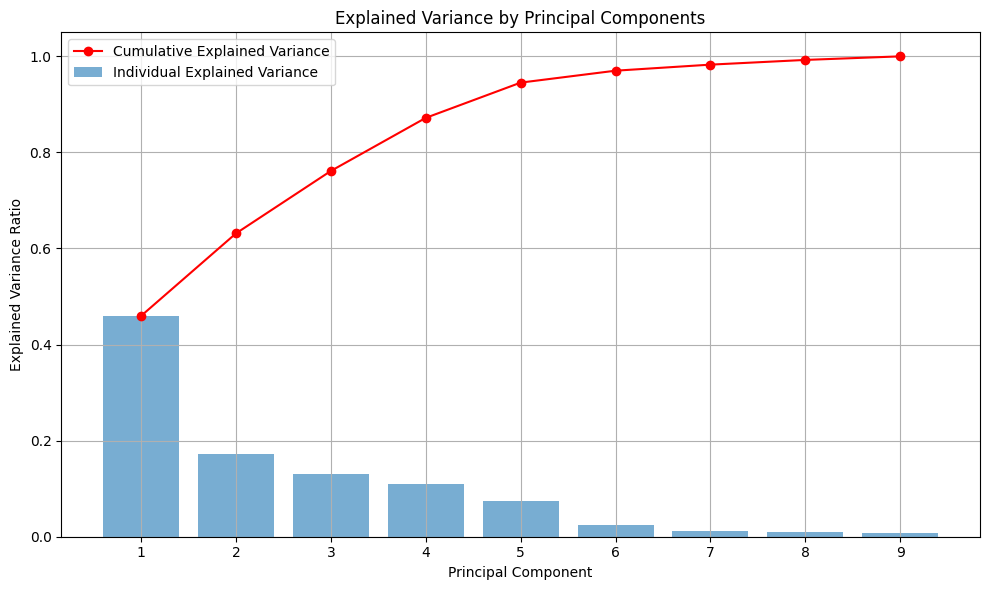

In [20]:
# Fit PCA without limiting components to see how much variance is captured
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# Get explained variance ratio
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Plot explained and cumulative variance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='red', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This explained variance plot shows how much information (variance) each principal component retains. The first principal component (PC1) captures about 46% of the total variance, and the second (PC2) brings the cumulative variance to over 63%. With just the first four components, over 90% of the variance is retained. This indicates that the original 9-dimensional dataset can be effectively reduced to just 3 or 4 principal components without significant information loss, making PCA a powerful tool for simplifying and visualizing complex data.